In [6]:
import pandas as pd
from pyne.material import Material as m
from pyne import nucname
import numpy as np
from matplotlib import pyplot as plt

In [8]:
names = [
        'assembly_id',
        'reactor_id',
        'reactor_type',
        'initial_uranium_kg',
        'initial_enrichment',
        'discharge_burnup',
        'discharge_date',
        'discharge_time',
        'total_assembly_decay_heat_kw',
        'name',
        'evaluation_date',
        'total_mass_g',
        'total_radioactivity_curies']
df = pd.read_csv('SNF_nuclide_2020_07_01.dat',
                 sep='\s+',
                 index_col=False,
                 names=names)

In [9]:
keep = df[['assembly_id','reactor_id','reactor_type','discharge_date','total_assembly_decay_heat_kw','name','total_mass_g']]

In [10]:
#BWRs 
BWR = keep.loc[keep['reactor_type'] == 'BWR']
# keep first BWR 
BWR_1 = keep.loc[keep['reactor_id'] == 122]
# keep first assembly
BWR_2 = keep.loc[keep['assembly_id'] == 254897]
heat = keep.groupby((df["assembly_id"] != df["assembly_id"].shift()).cumsum().values).first()
heat = heat[['assembly_id','total_assembly_decay_heat_kw']]

In [11]:
def decay_assembly(assembly_id): 
    assem = keep.loc[keep['assembly_id'] == assembly_id]
    compdict = {}
    for index, row in assem.iterrows():
        if row['assembly_id'] == assembly_id: 
            nuc = row['name']
            mass = row['total_mass_g']
            if nuc == 'ag-108m' or nuc == 'am-242m' or nuc == 'ag-110m': # meta stable nucs dont work?
                compdict = compdict 
            else:
                compdict[nucname.id(nuc)] = mass
    new_m = m(compdict,mass = -1)
    decayheat = new_m.decay_heat()
    decayheat_total = 0
    for key,val in decayheat.items(): 
        decayheat_total += val*10**3
    
    return decayheat_total 

In [12]:
heat

,assembly_id,total_assembly_decay_heat_kw
1,254897,0.060320
2,254898,0.060361
3,254899,0.060332
4,254900,0.060324
5,254901,0.060073
6,254902,0.060121
7,254903,0.060107
8,254904,0.060108
9,254905,0.059608
10,254906,0.059644


In [ ]:
n = 244895
newheat = heat.head(n)
calc_heat = np.zeros(n)
perc_diff = np.zeros(n)
i = 0
LOG_EVERY_N = 1000
for index, row in newheat.iterrows():
    calc_heat[i] = decay_assembly(row['assembly_id'])
    perc_diff[i] = calc_heat[i]/row['total_assembly_decay_heat_kw']*100
    if (i % LOG_EVERY_N) == 0:
        print('LOG',i)
    i +=1
newheat['calc_heat'] = calc_heat
newheat['perc_diff'] = perc_diff

LOG 0
LOG 1000
LOG 2000
LOG 3000
LOG 4000
LOG 5000
LOG 6000


In [ ]:
newheat

In [ ]:
# To store once created
newheat.to_pickle('./decayheat_2020.dat')

In [3]:
# To load picked files into this notebook
newheat_1 = pd.read_pickle('./decayheat_1.dat')

In [4]:
newheat_1

,assembly_id,total_assembly_decay_heat_kw,calc_heat,perc_diff
1,254897,0.801130,0.231422,28.886903
2,254898,0.801420,0.231538,28.890963
3,254899,0.801013,0.231402,28.888615
4,254900,0.800920,0.231390,28.890583
5,254901,0.797371,0.230203,28.870244
6,254902,0.798022,0.230397,28.871004
7,254903,0.797828,0.230335,28.870244
8,254904,0.797845,0.230346,28.871004
9,254905,0.790827,0.228034,28.834879
10,254906,0.791610,0.228268,28.835947


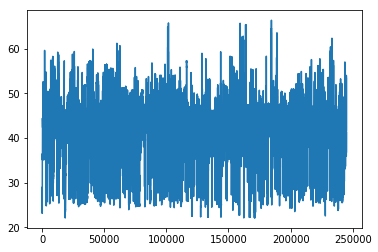

In [7]:
plt.plot(newheat_1['perc_diff'])